### Full Implementation (Adagrad)

In [1]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
#====================================================================================================================================================================
error = lambda y_pred, y_true: y_pred - y_true  # (y_pred - y_true)
hypothsis = lambda x_values, weights: x_values @ weights
gradient = lambda error, x_values: ((error.reshape(1,-1) @ x_values)/error.size).reshape(-1,1)
#====================================================================================================================================================================
def Adagrad(features, label, batchSize, alpha = 0.001, epsilon = 1e-8, iterations = 0):
    """vectorize implementation of 
        the Gradient Descent algorithm using Adaptive learning rate"""
    
    def divide_chunks(x_values, chunkSize): 
        # looping till length x_values_rows
        for i in range(0, len(x_values), chunkSize): 
            yield x_values[i:i + chunkSize]
    
    splited_features = [np.array(list(f)) for f in divide_chunks(features, batchSize)]
    splited_label = [np.array(list(l)) for l in divide_chunks(label, batchSize)]
    
    weights = np.zeros((features.shape[1], 1)).reshape(-1,1)   
    vect_vt = np.zeros((features.shape[1], 1)).reshape(-1,1)   

    rows_iterations = 1
    epochs_iterations = 1
    losses = []
    all_bias = []
    all_weight_1 = []
    all_hypothsis = []
   
    # epochs loop
    while True:
        #mini batch loop
        for x, y_true in zip(splited_features, splited_label) :
            y_pred = hypothsis(x, weights)
            all_hypothsis.append(y_pred)
            #=======================================================================
            squared_error = error(y_pred, y_true) ** 2
            if squared_error.size > 1:
                losses.append(np.mean(squared_error)/2)                        # J = (sum(squared_error)/(2*squared_error.size))
            else:
                losses.append(squared_error[0])
            #=======================================================================
            gradient_vector = gradient(error(y_pred, y_true), x)
            vect_vt = vect_vt + gradient_vector**2
            weights = weights - ((alpha * gradient_vector) / (np.sqrt(vect_vt) + epsilon))
            #=======================================================================
            all_bias.append(weights[0])
            all_weight_1.append(weights[1])
            #=======================================================================
            rows_iterations += 1
        #=======================================================================        
        epochs_iterations += 1   
        if(epochs_iterations == iterations):                       # 1st stopping condtion -> user entered iterations, Note: Iterations are deafaulted to zero
                print("Gradient Vector \n", gradient_vector)
                print (f"Iterations Number = {rows_iterations}")
                break
                
        if(rows_iterations > 2):                                  # 2nd stopping condtion -> new thetas doesn't affect the cost function value any more 
            if(abs(np.round(losses[-1] - losses[-2], 5)) == 0):
                print(f"cost[-1] = {losses[-1]} And cost[-2] = {losses[-2]}")
                print (f"Iterations Number = {rows_iterations}")
                break
                
        if((sum((np.round(abs(gradient_vector), 3) != 0)) == 0)):# 3rd stopping condtions -> gradient equals to zero
            print(">>Gradient Vector \n", gradient_vector)
            print (f"Iterations Number = {rows_iterations}")
            break
    return weights, losses, all_bias, all_weight_1, all_hypothsis, epochs_iterations

====================Adagrad====================
cost[-1] = 0.0002984604626081538 And cost[-2] = 0.000303432542191991
Iterations Number = 495


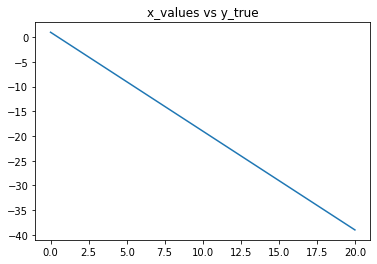

R2 Score = 0.9999957691403015


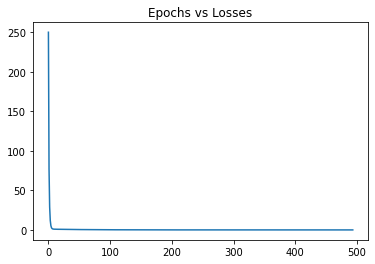

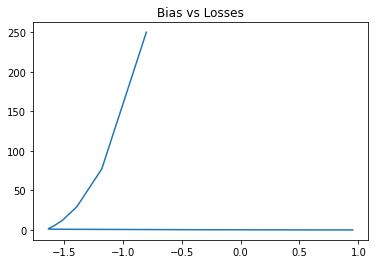

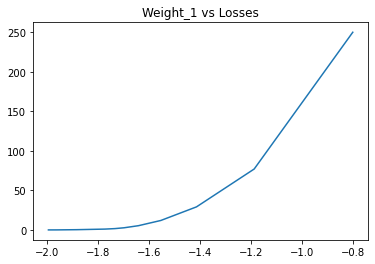

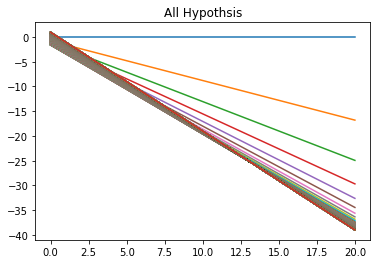

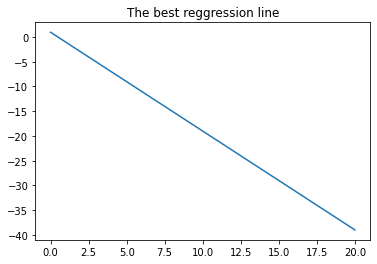

In [2]:
print("====================Adagrad====================")
x = np.linspace(0,20)
np_x = np.array(x).reshape(-1,1)
np_y = -2*np_x + 1
features = np.ones((x.size,1))
features = np.append(features, np_x, axis=1)
batchSize = np_x.size
#=======================================================================
weights, losses, bias, weight_1, all_hypothsis, epochs_iterations = Adagrad(features, np_y, batchSize, alpha=0.8)
#=======================================================================
plt.plot(np_x, np_y)
plt.title("x_values vs y_true")
plt.show()
print("=================================================================")
y_pred = hypothsis(features, weights)
print(f"R2 Score = {r2_score(np_y, y_pred)}")
print("=================================================================")
plt.plot(np.arange(epochs_iterations-1).reshape(-1,1), np.array(losses).reshape(-1,1))
plt.title("Epochs vs Losses")
plt.show()
print("=================================================================")
plt.plot(bias, losses)
plt.title("Bias vs Losses")
plt.show()
print("=================================================================")
plt.plot(weight_1, losses)
plt.title("Weight_1 vs Losses")
plt.show()
print("=================================================================")
for y in np.array(all_hypothsis):
    plt.plot(np_x, y)
plt.title("All Hypothsis")
plt.show()
print("=================================================================")
plt.plot(np_x, y_pred)
plt.title("The best reggression line")
plt.show()
print("=================================================================")
print("=================================================================")

### Full Implementation (RMSProb)

In [3]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
#====================================================================================================================================================================
error = lambda y_pred, y_true: y_pred - y_true  # (y_pred - y_true)
hypothsis = lambda x_values, weights: x_values @ weights
gradient = lambda error, x_values: ((error.reshape(1,-1) @ x_values)/error.size).reshape(-1,1)
#====================================================================================================================================================================
def RMSProb(features, label, batchSize, alpha = 0.001, beta = 0.98, epsilon = 1e-8, iterations = 0):
    """vectorize implementation of 
        the Gradient Descent algorithm using Adaptive learning rate"""
    
    def divide_chunks(x_values, chunkSize): 
        # looping till length x_values_rows
        for i in range(0, len(x_values), chunkSize): 
            yield x_values[i:i + chunkSize]
    
    splited_features = [np.array(list(f)) for f in divide_chunks(features, batchSize)]
    splited_label = [np.array(list(l)) for l in divide_chunks(label, batchSize)]
    
    weights = np.zeros((features.shape[1], 1)).reshape(-1,1)   
    vect_vt = np.zeros((features.shape[1], 1)).reshape(-1,1)   

    rows_iterations = 1
    epochs_iterations = 1
    losses = []
    all_bias = []
    all_weight_1 = []
    all_hypothsis = []
   
    # epochs loop
    while True:
        #mini batch loop
        for x, y_true in zip(splited_features, splited_label) :
            y_pred = hypothsis(x, weights)
            all_hypothsis.append(y_pred)
            #=======================================================================
            squared_error = error(y_pred, y_true) ** 2
            if squared_error.size > 1:
                losses.append(np.mean(squared_error)/2)                        # J = (sum(squared_error)/(2*squared_error.size))
            else:
                losses.append(squared_error[0])  
            #=======================================================================
            gradient_vector = gradient(error(y_pred, y_true), x)
            vect_vt = beta * vect_vt + ((1 - beta) * gradient_vector**2)
            weights = weights - ((alpha * gradient_vector) / (np.sqrt(vect_vt) + epsilon))
            #=======================================================================
            all_bias.append(weights[0])
            all_weight_1.append(weights[1])
            #=======================================================================
            rows_iterations += 1
        #=======================================================================        
        epochs_iterations += 1   
        if(epochs_iterations == iterations):                       # 1st stopping condtion -> user entered iterations, Note: Iterations are deafaulted to zero
                print("Gradient Vector \n", gradient_vector)
                print (f"Iterations Number = {rows_iterations}")
                break
                
        if(rows_iterations > 2):                                  # 2nd stopping condtion -> new thetas doesn't affect the cost function value any more 
            if(abs(np.round(losses[-1] - losses[-2], 5)) == 0):
                print(f"cost[-1] = {losses[-1]} And cost[-2] = {losses[-2]}")
                print (f"Iterations Number = {rows_iterations}")
                break
                
        if((sum((np.round(abs(gradient_vector), 3) != 0)) == 0)):# 3rd stopping condtions -> gradient equals to zero
            print(">>Gradient Vector \n", gradient_vector)
            print (f"Iterations Number = {rows_iterations}")
            break
    return weights, losses, all_bias, all_weight_1, all_hypothsis, epochs_iterations

====================RMSProb====================
cost[-1] = 3.0166048057962692e-05 And cost[-2] = 3.5094768265063166e-05
Iterations Number = 122


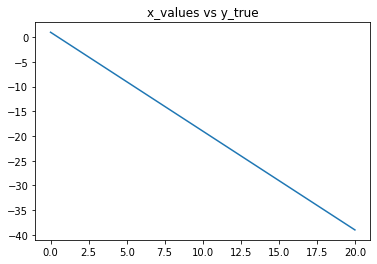

R2 Score = 0.999999626899874


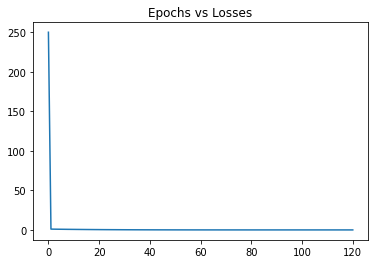

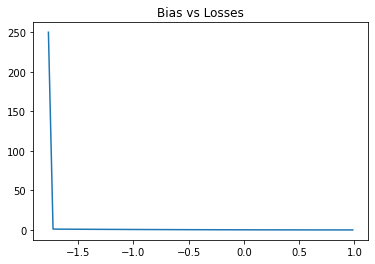

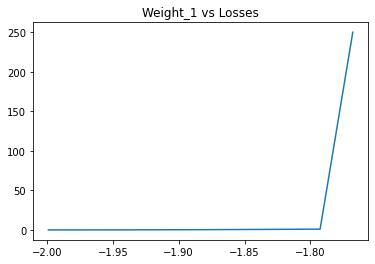

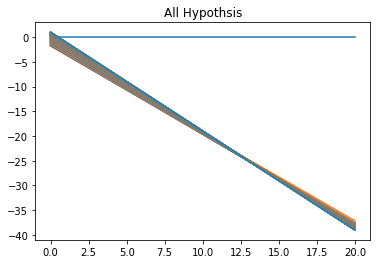

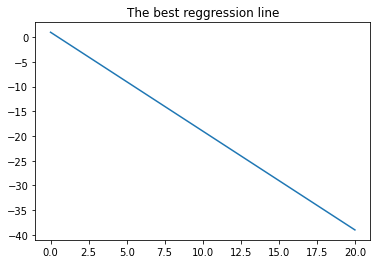

In [4]:
print("====================RMSProb====================")
x = np.linspace(0,20)
np_x = np.array(x).reshape(-1,1)
np_y = -2*np_x + 1
features = np.ones((x.size,1))
features = np.append(features, np_x, axis=1)
batchSize = np_x.size
#=======================================================================
weights, losses, bias, weight_1, all_hypothsis, epochs_iterations = RMSProb(features, np_y, batchSize, alpha=0.25)
#=======================================================================
plt.plot(np_x, np_y)
plt.title("x_values vs y_true")
plt.show()
print("=================================================================")
y_pred = hypothsis(features, weights)
print(f"R2 Score = {r2_score(np_y, y_pred)}")
print("=================================================================")
plt.plot(np.arange(epochs_iterations-1).reshape(-1,1), np.array(losses).reshape(-1,1))
plt.title("Epochs vs Losses")
plt.show()
print("=================================================================")
plt.plot(bias, losses)
plt.title("Bias vs Losses")
plt.show()
print("=================================================================")
plt.plot(weight_1, losses)
plt.title("Weight_1 vs Losses")
plt.show()
print("=================================================================")
for y in np.array(all_hypothsis):
    plt.plot(np_x, y)
plt.title("All Hypothsis")
plt.show()
print("=================================================================")
plt.plot(np_x, y_pred)
plt.title("The best reggression line")
plt.show()
print("=================================================================")
print("=================================================================")

### Full Implementation (Adam)

In [5]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
#====================================================================================================================================================================
error = lambda y_pred, y_true: y_pred - y_true  # (y_pred - y_true)
hypothsis = lambda x_values, weights: x_values @ weights
gradient = lambda error, x_values: ((error.reshape(1,-1) @ x_values)/error.size).reshape(-1,1)
#====================================================================================================================================================================
def Adam(features, label, batchSize, alpha = 0.001, beta_1 = 0.98, beta_2 = 0.999, epsilon = 1e-8, iterations = 0):
    """vectorize implementation of 
        the Gradient Descent algorithm using Adaptive learning rate"""
    
    def divide_chunks(x_values, chunkSize): 
        # looping till length x_values_rows
        for i in range(0, len(x_values), chunkSize): 
            yield x_values[i:i + chunkSize]
    
    splited_features = [np.array(list(f)) for f in divide_chunks(features, batchSize)]
    splited_label = [np.array(list(l)) for l in divide_chunks(label, batchSize)]
    
    weights = np.zeros((features.shape[1], 1)).reshape(-1,1)   
    vect_vt = np.zeros((features.shape[1], 1)).reshape(-1,1)   
    vect_momentum = np.zeros((features.shape[1], 1)).reshape(-1,1)   

    rows_iterations = 1
    epochs_iterations = 1
    losses = []
    all_bias = []
    all_weight_1 = []
    all_hypothsis = []
   
    # epochs loop
    while True:
        #mini batch loop
        for x, y_true in zip(splited_features, splited_label) :
            y_pred = hypothsis(x, weights)
            all_hypothsis.append(y_pred)
            #=======================================================================
            squared_error = error(y_pred, y_true) ** 2
            if squared_error.size > 1:
                losses.append(np.mean(squared_error)/2)                        # J = (sum(squared_error)/(2*squared_error.size))
            else:
                losses.append(squared_error[0])  
            #=======================================================================
            gradient_vector = gradient(error(y_pred, y_true), x)
            
            vect_momentum = (beta_1 * vect_momentum) + ((1 - beta_1) * gradient_vector)
            vect_momentum_dash = vect_momentum / (1 - beta_1 ** rows_iterations)
            
            vect_vt = (beta_2 * vect_vt) + ((1 - beta_2) * gradient_vector**2)
            vect_vt_dash = vect_vt / (1 - beta_2 ** rows_iterations)
            weights = weights - ((alpha * vect_momentum_dash) / (np.sqrt(vect_vt_dash) + epsilon))
            #=======================================================================
            all_bias.append(weights[0])
            all_weight_1.append(weights[1])
            #=======================================================================
            rows_iterations += 1
        #=======================================================================        
        epochs_iterations += 1   
        if(epochs_iterations == iterations):                      # 1st stopping condtion -> user entered iterations, Note: Iterations are deafaulted to zero
            print("Gradient Vector \n", gradient_vector)
            print (f"Iterations Number = {rows_iterations}")
            break
                
        if(rows_iterations > 2):                                  # 2nd stopping condtion -> new thetas doesn't affect the cost function value any more 
            if(abs(np.round(losses[-1] - losses[-2], 5)) == 0):
                print(f"cost[-1] = {losses[-1]} And cost[-2] = {losses[-2]}")
                print (f"Iterations Number = {rows_iterations}")
                break
                
        if((sum((np.round(abs(gradient_vector), 3) != 0)) == 0)): # 3rd stopping condtions -> gradient equals to zero
            print(">>Gradient Vector \n", gradient_vector)
            print (f"Iterations Number = {rows_iterations}")
            break
    return weights, losses, all_bias, all_weight_1, all_hypothsis, epochs_iterations

====================Adam====================
cost[-1] = 0.11061443916831554 And cost[-2] = 0.11061436013418606
Iterations Number = 342


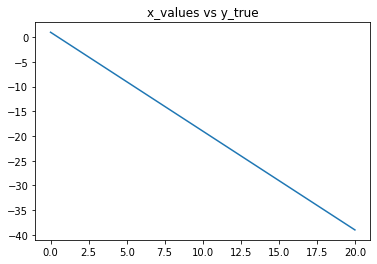

R2 Score = 0.99847018705113


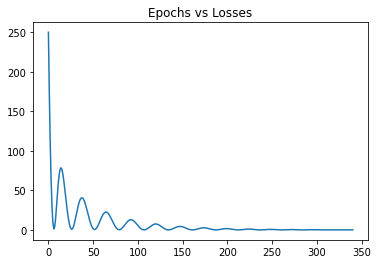

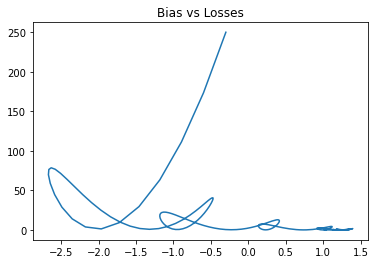

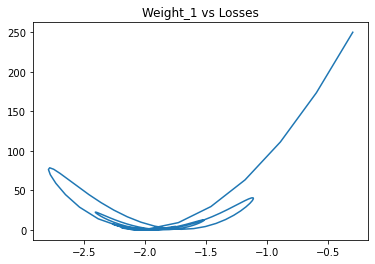

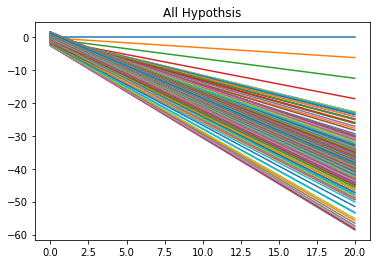

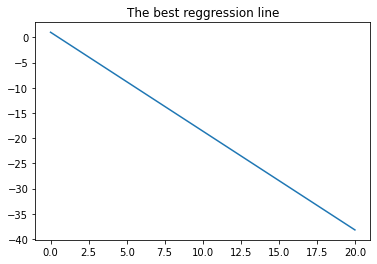

In [6]:
print("====================Adam====================")
x = np.linspace(0,20)
np_x = np.array(x).reshape(-1,1)
np_y = -2*np_x + 1
features = np.ones((x.size,1))
features = np.append(features, np_x, axis=1)
batchSize = np_x.size
#=======================================================================
weights, losses, bias, weight_1, all_hypothsis, epochs_iterations = Adam(features, np_y, batchSize, alpha=0.3)
#=======================================================================
plt.plot(np_x, np_y)
plt.title("x_values vs y_true")
plt.show()
print("=================================================================")
y_pred = hypothsis(features, weights)
print(f"R2 Score = {r2_score(np_y, y_pred)}")
print("=================================================================")
plt.plot(np.arange(epochs_iterations-1).reshape(-1,1), np.array(losses).reshape(-1,1))
plt.title("Epochs vs Losses")
plt.show()
print("=================================================================")
plt.plot(bias, losses)
plt.title("Bias vs Losses")
plt.show()
print("=================================================================")
plt.plot(weight_1, losses)
plt.title("Weight_1 vs Losses")
plt.show()
print("=================================================================")
for y in np.array(all_hypothsis):
    plt.plot(np_x, y)
plt.title("All Hypothsis")
plt.show()
print("=================================================================")
plt.plot(np_x, y_pred)
plt.title("The best reggression line")
plt.show()
print("=================================================================")
print("=================================================================")